# Integration 
> 이론적인 적분을 하기 힘든 함수를 scipy integrate or sympy 를 이용해서 구할 예정이다.

In [1]:
from scipy.integrate import quad
import scipy.stats as SS
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym

In [2]:
def integrand(x):
    return np.sin(x)

In [3]:
x,y = sym.symbols('x y')

In [4]:
g_c = lambda x : SS.cauchy.pdf(x,0,1)
g_n = lambda x : SS.norm.pdf(x,0,1)

In [11]:
x,y,z,r,psi,t = sym.symbols('x y z r psi t')
a = sym.symbols('a')
x_dot,y_dot,z_dot,r_dot,psi_dot,t_dot = sym.symbols('x_dot y_dot z_dot r_dot psi_dot t_dot')
x_dot

x_dot

In [73]:
X = r*sym.cos(psi)
Y = r*sym.sin(psi)
dX = r_dot*sym.cos(psi) -Y*psi_dot
dY = r_dot*sym.sin(psi) +X*psi_dot

In [74]:
sym.simplify(X**2 +Y**2)

r**2

In [64]:
dX,dY,X,Y = sym.symbols('dX,dY,X,Y')

In [75]:
F =dX**2 +dY**2 - (X*dX + Y*dY)**2/(a**2+r**2)

In [77]:
co_F = sym.simplify(F)
sym.collect(co_F,dX)

(-r**2*r_dot**2 + (a**2 + r**2)*(psi_dot**2*r**2 + r_dot**2))/(a**2 + r**2)

In [28]:
sym.simplify(dX**2+dY**2)

dX**2 + dY**2

In [5]:
def r_lock1(X,m,g):
    integrand = lambda x:np.cos(x)**2*g(X*np.sin(x))
    omega_p = (4/np.pi)*np.sqrt(X/m)
    theta_p = np.arcsin(omega_p/X)
    I_ = quad(integrand,-theta_p,theta_p)
    return X*I_[0]


def r_lock2(X,m,g):
    integrand = lambda x:np.cos(x)**2*g(X*np.sin(x))
    I_ = quad(integrand,-np.pi/2,np.pi/2)
    return X*I_[0]

def r_drift2(X,m,g):
    O_d = X
    A = lambda x:1/(x**3)
    integrand = lambda x:A(x)*g(x)
    I_ = quad(integrand,O_d,np.inf)
    return X/(m**2)*I_[0]

def r_drift1(X,m,g):
    O_p = (4/np.pi)*np.sqrt(X/m)
    A = lambda x:1/(x**3)
    integrand = lambda x:A(x)*g(x)
    I_ = quad(integrand,O_p,np.inf)
    return X/(m**2)*I_[0]

In [1]:
from TO_sim.analytical import order_parameter as RR
from TO_sim.To_Draw import Draw_theoretical_wData as DD
import parmap
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.logspace(np.log10(0.1),np.log10(50),num=1000,base=10)

In [4]:
m = 0.95

In [5]:
r_l1=parmap.map(RR.r_lock1,X,m=m,g=RR.g_n,pm_processes=16,pm_pbar=True)
r_l2=parmap.map(RR.r_lock2,X,m=m,g=RR.g_n,pm_processes=16,pm_pbar=True)
r_d1=parmap.map(RR.r_drift1,X,m=m,g=RR.g_n,pm_processes=16,pm_pbar=True)
r_d2=parmap.map(RR.r_drift2,X,m=m,g=RR.g_n,pm_processes=16,pm_pbar=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [7]:

r_case1 = r_l1+r_d1
r_case2 = r_l2+r_d2

r_l2,r_d2,r_l1,r_d1 = map(np.array,[r_l2,r_d2,r_l1,r_d1])

KF =[]
RF =[]
KB =[]
RB =[]
Ks = np.linspace(0,13,20000)
for K_  in  Ks:
        i=0
        # plt.plot(X,X/K_)
        i+=1
        TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
        if len(TEMP_2)!=0:
            for R_ in TEMP_2:
                KB.append(K_)
                RB.append(R_)
        TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]
        if len(TEMP_1)!=0:
            for R_ in TEMP_1:
                KF.append(K_)
                RF.append(R_)
                    

C:\Users\kim9y\AppData\Local\Temp\ipykernel_41636\1897647444.py:15: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
C:\Users\kim9y\AppData\Local\Temp\ipykernel_41636\1897647444.py:20: RuntimeWarning: divide by zero encountered in true_divide
  TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]


In [74]:
Ks = np.linspace(1.6,13,20000)

In [75]:
r_case1 = r_l1+r_d1
r_case2 = r_l2+r_d2

r_l2,r_d2,r_l1,r_d1 = map(np.array,[r_l2,r_d2,r_l1,r_d1])

KF =[]
RF =[]
KB =[]
RB =[]

for K_  in  Ks[::1]:
        i=0
        # plt.plot(X,X/K_)
        i+=1
        TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
        if len(TEMP_2)!=0:
            for R_ in TEMP_2:
                KB.append(K_)
                RB.append(R_)
        TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]
        if len(TEMP_1)!=0:
            for R_ in TEMP_1:
                KF.append(K_)
                RF.append(R_)
                    
                    

In [76]:

KF =[]
RF =[]
KB =[]
RB =[]

for K_  in  Ks[::1]:
        i=0
        # plt.plot(X,X/K_)
        i+=1
        TEMP_2 = (X/K_)[abs(r_case2-X/K_)<1e-3]
        if len(TEMP_2)!=0:
            for R_ in TEMP_2:
                KB.append(K_)
                RB.append(R_)
        TEMP_1 = (X/K_)[abs(r_case1-X/K_)<1e-3]
        if len(TEMP_1)!=0:
            for R_ in TEMP_1:
                KF.append(K_)
                RF.append(R_)
                    
                    

In [7]:
m =8

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

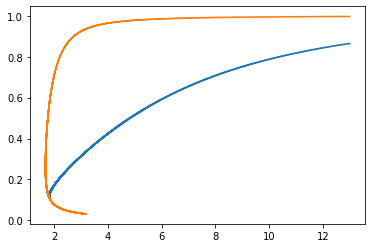

In [8]:
Draw_ = DD(m,dist='normal')
Draw_.total()

In [11]:
r_lock2(0.1,m,g_c)

NameError: name 'r_lock2' is not defined

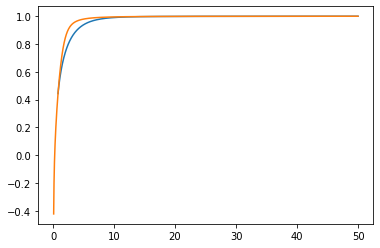

In [10]:
# plt.plot(X,r_l2)
# plt.plot(X,r_d2)
plt.plot(X,r_d1+r_l1)
plt.plot(X,r_d2+r_l2)
# plt.xlim(0,0.1)
# plt.plot(X,R1)
# plt.plot(X,R2)

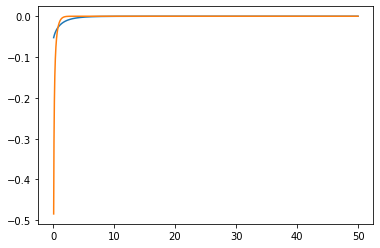

In [13]:
plt.plot(X,r_d1)
plt.plot(X,r_d2)

In [52]:
X = ss.Cauchy(x,0,d)
g = ss.density(X)

In [68]:
def integrand(theta):
    f = sm.simplify(sm.cos(theta)**2*g(A*sm.sin(theta)))*sm.pi
    return f

In [43]:
sm.integrate(integrand(x),(x,0,1))

1 - cos(1)

In [53]:
def temp(x,m,d):
    O_p = (4/np.pi)*np.sqrt(x/m)
    t_p = np.arcsin(O_p/x)
    pi = np.pi
    r_drift1 = (x/m**2)*((1/(pi*d**3))*np.log(np.sqrt(d**2+O_p**2)/O_p)-1/(2*pi*d*O_p**2))
    return r_drift1

temp2 = lambda x,m,d:(x/(m**2))*((1/(np.pi*d**3))*np.log(np.sqrt(d**2+x**2)/(x))-1/(2*np.pi*d*x**2))

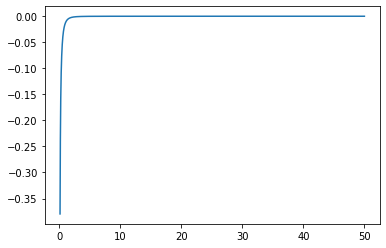

In [55]:
# plt.plot(X,temp(X,m,1))
plt.plot(X,temp2(X,m,1))

In [44]:
def normal(x,mu,sig):
    A = 1/(sig*sm.sqrt(2*sm.pi))
    B = -1/2*((x-mu)/sig)
    return A*sm.exp(B)

In [45]:
sm.integrate(normal(x,0,1),(x,-np.inf,np.inf))


oo

In [46]:
X = ss.Cauchy(x,0,d)

In [49]:
ss.density(X)(3)

1/(pi*d*(1 + 9/d**2))

# simulation check

In [9]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import pandas as pd

from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel_sim as Hp
from TO_sim.Utility import *
import parmap

In [78]:
N = 500
dist = 'Quantile Normal'
t_end = 200
ss = 14
N = 500
dK = 0.2
dt = 0.1
m = 0.95
applys = [1]
save = True
    
df_sets = {}
rdf_sets = {}

for A in applys:
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=A, seed=7)
    df_sets[A] = df
    rdf_sets[A] = rdf

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

In [24]:
DF = 'Review/22.11.30/Normal distribution/'
Create_Folder(DF)

In [33]:
m=2

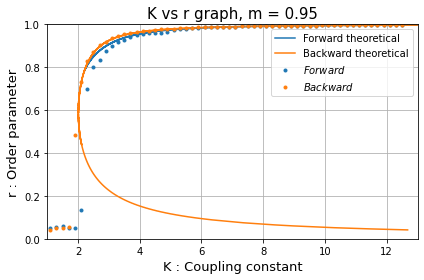

In [79]:
ST = 50
Ks = df.index
Ksr = rdf.index
data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
Draw_.total()

plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
plt.legend()  
plt.title(f'K vs r graph, m = {m}',fontsize= 15)
plt.grid()

plt.xlim(1,13)
plt.ylim(0,1)

plt.xlabel('K : Coupling constant',fontsize=13)
plt.ylabel('r : Order parameter',fontsize=13)
plt.tight_layout()
plt.savefig(DF+f'{dist},m = {m}, K vs r graph.png',dpi=400)